In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier


In [153]:
import boto3
bucket_name = 'dataminds-warehouse'
s3_file_key = 'multisim_dataset.parquet'            # e.g. 'folder/myfile.txt'
local_file_path = 'multisim_dataset.parquet'        # Local destination

# Create an S3 client (remove `bucket_name` here — not a valid argument for boto3.client)
s3 = boto3.client(
    's3',
    region_name='us-east-1'
    # aws_access_key_id='your_access_key',
    # aws_secret_access_key='your_secret_key'
)

# Download the file
try:
    s3.download_file(bucket_name, s3_file_key, local_file_path)
    print(f"✅ File downloaded successfully from s3://{bucket_name}/{s3_file_key} to {local_file_path}")
except Exception as e:
    print("❌ Error downloading file:", e)

✅ File downloaded successfully from s3://dataminds-warehouse/multisim_dataset.parquet to multisim_dataset.parquet


In [154]:
df=pd.read_parquet('multisim_dataset.parquet')

In [155]:
df.shape

(10000, 132)

In [156]:
df.describe()

,tenure,val2_1,val3_1,val4_1,val5_1,val6_1,val7_1,val8_1,val9_1,val10_1,...,val13_6,val14_6,val15_6,val16_6,val17_6,val18_6,val19_6,val20_6,val21_6,target
count,9974.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,9728.000000,9728.000000,9.728000e+03,9.728000e+03,9.728000e+03,9.728000e+03,9728.000000,9728.000000,9728.000000,10000.000000
mean,3705.959996,12.236181,3.446700,83.165400,132.10566,26.930500,32.450760,10.987100,13.048270,14.784100,...,2028.914189,0.141146,8.848952e-01,1.577953e+00,3.542630e-01,4.751151e-01,185.486842,67.556127,20.955387,0.500000
std,2662.023191,16.818445,4.948314,161.116319,322.39447,61.231913,84.935862,29.115987,42.586931,37.451093,...,9118.745830,2.658871,2.040635e+00,2.878263e+00,1.045168e+00,1.238263e+00,259.493942,132.488722,49.859408,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-6.183982e-08,-1.108646e-07,-3.352761e-08,-3.576279e-08,0.000000,0.000000,0.000000,0.000000
25%,1256.250000,2.000000,1.000000,4.000000,3.37500,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,37.000000,3.000000,0.000000,0.000000
50%,3022.500000,6.000000,2.000000,26.000000,31.00000,5.000000,4.500000,1.000000,0.900000,2.000000,...,0.000000,0.000000,1.500000e-01,4.400000e-01,0.000000e+00,1.072884e-08,96.000000,20.000000,4.000000,0.500000
75%,6261.000000,16.000000,4.000000,85.000000,114.00000,23.000000,23.200000,8.000000,8.000000,11.000000,...,200.062908,0.000000,9.000000e-01,2.000000e+00,3.000000e-01,4.200000e-01,223.000000,67.000000,18.000000,1.000000
max,8978.000000,325.000000,90.000000,2628.000000,6219.30000,940.000000,2176.100000,504.000000,1667.600000,567.000000,...,159548.365647,192.462886,4.920000e+01,5.918000e+01,3.464000e+01,2.886000e+01,4488.000000,1958.000000,1070.000000,1.000000


In [157]:
df.head()

,telephone_number,trf,age,gndr,tenure,age_dev,dev_man,device_os_name,dev_num,is_dualsim,...,val13_6,val14_6,val15_6,val16_6,val17_6,val18_6,val19_6,val20_6,val21_6,target
9626,iWBn_13aJO,J,50,M,6957.0,1263,Samsung,Android OS,1,1,...,0.000000,0.0,0.00,0.56,0.00,0.00,60.0,7.0,0.0,1
34347,8JWaD2wYoQ,M,52,M,1041.0,125,Samsung,Android OS,2,1,...,206.536585,0.0,0.40,0.00,0.16,0.24,156.0,0.0,2.0,1
72797,sbPnQURi3j,A,49,U,7176.0,345,Samsung,Android OS,1,1,...,0.000000,0.0,0.25,2.35,0.00,0.25,241.0,87.0,4.0,1
68025,qOy-JlqPTl,M,49,M,4309.0,466,Samsung,Android OS,1,1,...,51.885746,0.0,0.00,0.00,0.00,0.00,299.0,142.0,80.0,1
31781,MNODhcb7h0,A,50,U,6999.0,695,Samsung,Android OS,1,1,...,0.000000,0.0,0.00,0.80,0.00,0.00,121.0,96.0,0.0,1


In [158]:
df.tail()

,telephone_number,trf,age,gndr,tenure,age_dev,dev_man,device_os_name,dev_num,is_dualsim,...,val13_6,val14_6,val15_6,val16_6,val17_6,val18_6,val19_6,val20_6,val21_6,target
10237,vjo-T0Bkap,F,44,M,2047.0,1401,Samsung,Android OS,1,1,...,0.000000,0.0,0.18,1.50,0.00,0.09,108.0,18.0,2.0,0
81420,hr9U3_0kXW,G,39,U,4908.0,176,Apple,iOS,2,1,...,457.193839,0.0,0.24,2.24,0.00,0.24,98.0,23.0,1.0,0
19572,xw1HISdQiO,H,32,M,5317.0,1088,Samsung,Android OS,1,1,...,184.259022,0.0,5.82,7.16,4.44,1.38,256.0,54.0,61.0,0
81067,r5nxa5j2G0,D,43,U,6850.0,1418,Samsung,Android OS,1,1,...,0.000000,0.0,1.90,4.10,0.10,1.80,92.0,31.0,14.0,0
90423,fcvlu4pk-Q,A,39,M,2121.0,517,Xiaomi,Android OS,1,1,...,0.000000,0.0,1.70,1.20,0.50,1.20,143.0,14.0,22.0,0


In [159]:
df_parital=df[['age','gndr','dev_man']] #as we did last time I am creating new dataframe

<Axes: xlabel='age', ylabel='Count'>

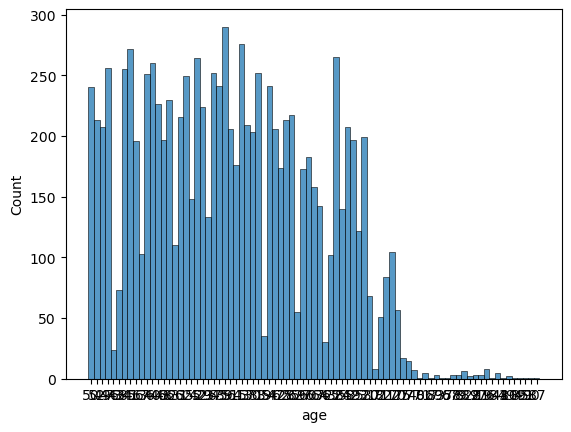

In [160]:
sns.histplot( data = df_parital, x= df_parital["age"])


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 9626 to 90423
Columns: 132 entries, telephone_number to target
dtypes: float64(111), int64(8), object(13)
memory usage: 10.1+ MB


In [162]:
print(df.isnull().sum())

telephone_number      0
trf                   0
age                  24
gndr                  0
tenure               26
                   ... 
val18_6             272
val19_6             272
val20_6             272
val21_6             272
target                0
Length: 132, dtype: int64


In [163]:
df_needed=df[['trf','age','gndr','tenure','age_dev','dev_man','device_os_name','dev_num','is_dualsim','is_featurephone','is_smartphone','region','target']]

In [164]:
numerical_df = df_needed.select_dtypes(include=np.number)

In [165]:
print(numerical_df.corr())

          tenure    target
tenure  1.000000  0.092402
target  0.092402  1.000000


<Axes: >

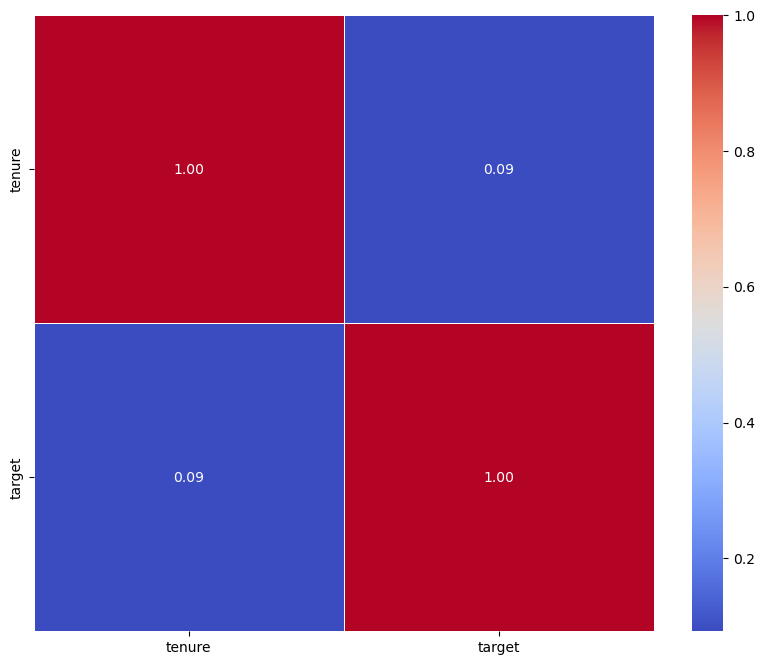

In [166]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

In [167]:
categorical_features=df_needed.select_dtypes(include=["object"]).columns.tolist()
categorical_features

['trf',
 'age',
 'gndr',
 'age_dev',
 'dev_man',
 'device_os_name',
 'dev_num',
 'is_dualsim',
 'is_featurephone',
 'is_smartphone',
 'region']

<Axes: xlabel='target', ylabel='tenure'>

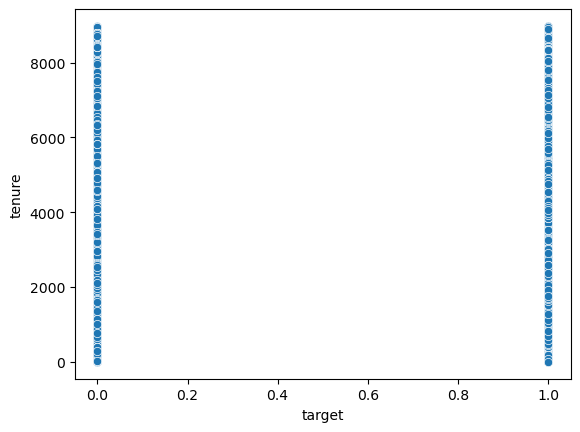

In [168]:
sns.scatterplot(data = df_needed, x= df_needed["target"], y= df_needed['tenure'])


In [169]:
pd.crosstab(index= df_needed['trf'], columns= df['dev_man'])

dev_man,Alcatel,Apple,Asus,Avenir Telecom,BQ,Blackshark,Callong,Casper,Connect Ltd,Doke Communication,...,Texet Impex,Tinno,Tpv,Ut Group Limited,Vestel,Vikin Communication Technology Co Limited,Vivo,Xiaomi,Xinchuangxin,ZTE
trf,,,,,,,,,,,,,,,,,,,,,
A,0,94,1,0,0,0,0,0,2,2,...,1,2,1,13,1,1,4,827,1,3
B,0,102,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,165,0,0
C,0,3,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,10,0,0
D,0,7,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,56,0,0
E,0,45,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,130,0,0
F,0,39,1,0,0,1,0,0,0,2,...,0,0,0,3,0,0,1,144,0,1
G,1,50,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,135,0,1
H,1,217,1,0,1,1,0,0,1,1,...,0,0,3,14,0,1,0,686,0,3
I,0,58,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,79,0,0


<Axes: xlabel='device_os_name', ylabel='target'>

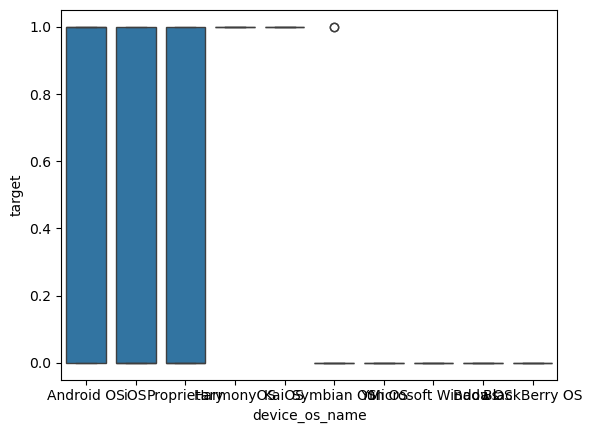

In [170]:
sns.boxplot( data = df_needed, x= df_needed['device_os_name'] ,  y= df_needed["target"])


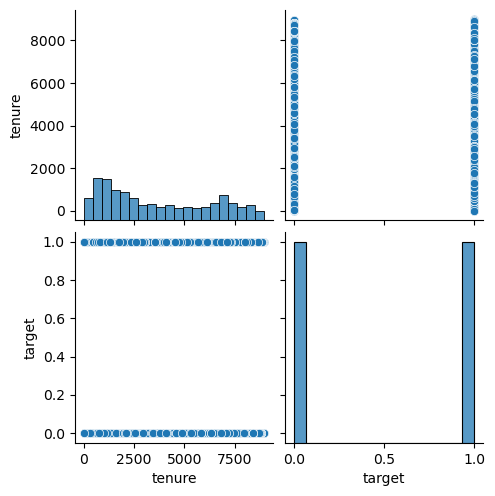

In [171]:
sns.pairplot( data = df_needed) #used for numerical so here only target and tenure is described

<Axes: xlabel='region', ylabel='target'>

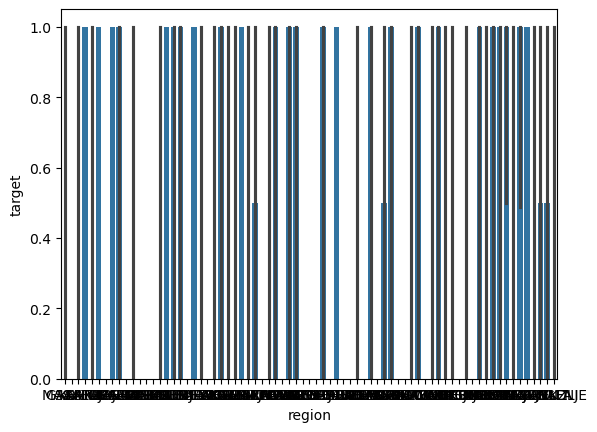

In [172]:
sns.barplot(data = df_needed,x=df_needed['region'],y=df_needed['target'],estimator = np.median)

In the part above I mainly did EDA of our dataset. FOr now i did not change anything about dataset, or cleaning data, and just looked at relathionship between different features. I just divided data into categorical and numerical data in order to do correct analysis. In addition to that, as I currently don't have any problems I have not decreased number of features

In [173]:
#now I am going to continue with feature engineering


In [174]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True) #shuffleing dataframe

In [175]:
df.head()

,telephone_number,trf,age,gndr,tenure,age_dev,dev_man,device_os_name,dev_num,is_dualsim,...,val13_6,val14_6,val15_6,val16_6,val17_6,val18_6,val19_6,val20_6,val21_6,target
0,UdM8XYVVt9,H,34,M,1264.0,431,Xiaomi,Android OS,1,1,...,0.000000,0.0,0.18,0.12,0.12,0.00,12.0,2.0,2.0,0
1,Oc_achLLpV,I,24,M,1124.0,435,Samsung,Android OS,1,1,...,451.632632,0.0,0.00,0.00,0.00,0.00,281.0,15.0,2.0,1
2,fcZa79z0e4,H,31,M,154.0,721,Samsung,Android OS,1,1,...,0.000000,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1
3,P3OgP9G5g4,F,43,M,475.0,398,Xiaomi,Android OS,1,1,...,0.000000,0.0,1.08,1.05,0.36,0.72,138.0,12.0,8.0,1
4,KBWEov4ydk,M,34,M,2087.0,5,Samsung,Android OS,3,1,...,224.738680,0.0,0.00,0.00,0.00,0.00,196.0,29.0,64.0,1


In [176]:
X=df.drop(columns="target")
y=df["target"]


In [177]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [178]:
X_train['age'] = pd.to_numeric(X_train['age'], errors='coerce') 
X_test['age'] = pd.to_numeric(X_test['age'], errors='coerce')
X_train['age'] = X_train['age'].fillna(X_train['age'].median())
X_test['age'] = X_test['age'].fillna(X_train['age'].median())

In [179]:
X_train['tenure'] = X_train['tenure'].fillna(X_train['tenure'].median())
X_test['tenure'] = X_test['tenure'].fillna(X_train['tenure'].median())

In [180]:
print(X_train.isnull().sum())

telephone_number      0
trf                   0
age                   0
gndr                  0
tenure                0
                   ... 
val17_6             215
val18_6             215
val19_6             215
val20_6             215
val21_6             215
Length: 131, dtype: int64


In [181]:
X_train['age_dev'] = pd.to_numeric(X_train['age_dev'], errors='coerce') 
X_test['age_dev'] = pd.to_numeric(X_test['age_dev'], errors='coerce')

In [182]:
X_train['dev_num'] = pd.to_numeric(X_train['dev_num'], errors='coerce') 
X_test['dev_num'] = pd.to_numeric(X_test['dev_num'], errors='coerce')

In [183]:
X_train['is_dualsim'] = pd.to_numeric(X_train['is_dualsim'], errors='coerce') 
X_test['is_dualsim'] = pd.to_numeric(X_test['is_dualsim'], errors='coerce')

In [184]:
X_train['is_featurephone'] = pd.to_numeric(X_train['is_featurephone'], errors='coerce') 
X_test['is_featurephone'] = pd.to_numeric(X_test['is_featurephone'], errors='coerce')

In [185]:
X_train['is_smartphone'] = pd.to_numeric(X_train['is_smartphone'], errors='coerce') 
X_test['is_smartphone'] = pd.to_numeric(X_test['is_smartphone'], errors='coerce')

In [186]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist() 
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

In [187]:
num_cols

['age',
 'tenure',
 'age_dev',
 'dev_num',
 'is_dualsim',
 'is_featurephone',
 'is_smartphone',
 'val2_1',
 'val3_1',
 'val4_1',
 'val5_1',
 'val6_1',
 'val7_1',
 'val8_1',
 'val9_1',
 'val10_1',
 'val11_1',
 'val12_1',
 'val13_1',
 'val14_1',
 'val15_1',
 'val16_1',
 'val17_1',
 'val18_1',
 'val19_1',
 'val20_1',
 'val21_1',
 'val2_2',
 'val3_2',
 'val4_2',
 'val5_2',
 'val6_2',
 'val7_2',
 'val8_2',
 'val9_2',
 'val10_2',
 'val11_2',
 'val12_2',
 'val13_2',
 'val14_2',
 'val15_2',
 'val16_2',
 'val17_2',
 'val18_2',
 'val19_2',
 'val20_2',
 'val21_2',
 'val2_3',
 'val3_3',
 'val4_3',
 'val5_3',
 'val6_3',
 'val7_3',
 'val8_3',
 'val9_3',
 'val10_3',
 'val11_3',
 'val12_3',
 'val13_3',
 'val14_3',
 'val15_3',
 'val16_3',
 'val17_3',
 'val18_3',
 'val19_3',
 'val20_3',
 'val21_3',
 'val2_4',
 'val4_4',
 'val5_4',
 'val6_4',
 'val7_4',
 'val8_4',
 'val9_4',
 'val10_4',
 'val11_4',
 'val12_4',
 'val13_4',
 'val14_4',
 'val15_4',
 'val16_4',
 'val17_4',
 'val18_4',
 'val19_4',
 'val20_4',

In [188]:
cat_cols

['telephone_number',
 'trf',
 'gndr',
 'dev_man',
 'device_os_name',
 'simcard_type',
 'region']

In [189]:
num_transformer = Pipeline(steps=
    [('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
#here I am using simple imputer and stardard scaler for standarizing values and I am using median in case data has outliers

In [190]:
cat_transformer=Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder(handle_unknown="ignore")),
])

In [191]:
preprocessor=ColumnTransformer(
    transformers=[
        ("num",num_transformer,num_cols),
        ("cat",cat_transformer,cat_cols)  ],
        remainder='passthrough'
)
#remainder='passthrough' was for columns that dont need preprocessing

In [193]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'tenure', 'age_dev', 'dev_num',
                                  'is_dualsim', 'is_featurephone',
                                  'is_smartphone', 'val2_1', 'val3_1', 'val4_1',
                                  'val5_1', 'val6_1', 'val7_1', 'val8_1',
                                  'val9_1', 'val10_1', 'val11_1', 'val12_1',
                                  'val13_1', 'val14_1', 'val15_1', 'val16_1',
                                  'val17_1', 'val18_1', 'val19_1', 'val20_1',
                                  'val21_1', 'val2_2', 'val3_2', 'val4_2', ...]),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['telephone_number', 'trf', 'gndr', 'dev_man',
                                  'device_os_name', 'simcard_type',
                                  'region'])])

In [194]:
import xgboost as xgb

In [195]:
xgb_pipeline=Pipeline(
    steps=[("preprocessor",preprocessor),
           ("classifier",xgb.XGBClassifier(objective='binary:logistic',eval_metric='logloss',random_state=42))
])
#here I didnt create xgb seperately and just used inside, writing the objective and other details

In [196]:
xgb_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'tenure', 'age_dev',
                                                   'dev_num', 'is_dualsim',
                                                   'is_featurephone',
                                                   'is_smartphone', 'val2_1',
                                                   'val3_1', 'val4_1', 'val5_1',
                                                   'val6_1', 'val7_1', 'val8_1',
                                                   'val9_1', 'val10_1'...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [197]:
from scipy.stats import randint, uniform

In [198]:
param_dist={
    'classifier__n_estimators':randint(50, 200),
    'classifier__max_depth':randint(3,10),
    'classifier__learning_rate':uniform(0.01,0.2),
    'classifier__subsample':uniform(0.6,0.4),
    'classifier__colsample_bytree':uniform(0.6,0.4)
}
#in the lesson slides we had approach os using specipic values 50,100,200, but I am using 50,200 which is not limited

rand_search = RandomizedSearchCV(
    xgb_pipeline, #model I want to tune
    param_distributions=param_dist, #distribution of tuned parameters
    n_iter=10,
    scoring='accuracy',
    cv=3, #model is  divided into 3 parts, trained and validated 3 tiems
    random_state=42,
)
#the last part is just function for tuning
rand_search.fit(X_train,y_train)


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'tenure',
                                                                                'age_dev',
                                                                                'dev_num',
                                                                                'is_dualsim',
                                                                                'is_featurephone',
                                                                                'is_smartphone',
                                                                                'val2_1',
                                                                                'val3_1',
                                                                                'val4_1',
                                                                                'val5_1',
                                                                                'val6_1',
                                                                                'v...
                                        'classifier__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f3230d2aa80>,
                                        'classifier__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f3230d29e80>,
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f3233ca5dc0>,
                                        'classifier__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f3230d2af60>},
                   random_state=42, scoring='accuracy')

In [135]:
print(rand_search.best_params_)

{'classifier__colsample_bytree': 0.9439761626945282, 'classifier__learning_rate': 0.14606150771755597, 'classifier__max_depth': 3, 'classifier__n_estimators': 67, 'classifier__subsample': 0.9795542149013333}


In [137]:
from sklearn.metrics import accuracy_score

In [142]:
best_one=rand_search.best_estimator_
y_pred = best_one.predict(X_test)

In [140]:
best_one

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'tenure', 'age_dev',
                                                   'dev_num', 'is_dualsim',
                                                   'is_featurephone',
                                                   'is_smartphone', 'val2_1',
                                                   'val3_1', 'val4_1', 'val5_1',
                                                   'val6_1', 'val7_1', 'val8_1',
                                                   'val9_1', 'val10_1'...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.14606150771755597, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=3,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=67,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])

In [143]:
y_pred

array([0, 1, 0, ..., 1, 1, 1])

In [144]:
accuracy_score(y_test, y_pred)

0.653

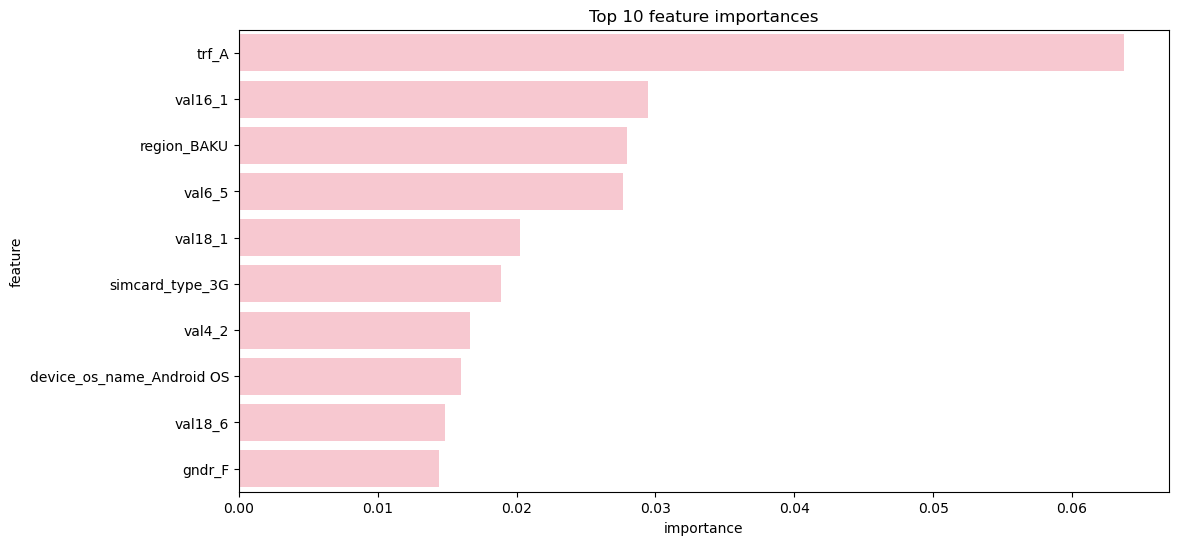

In [ ]:
final_xgb_one=best_one.named_steps['classifier'] #final xgb model
z=best_one.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder']
ohe = OneHotEncoder()
cat_features = ohe.get_feature_names_out(cat_cols)
features = np.concatenate([num_cols, cat_features]) #combining names previous and encoded ones
final_xgb = XGBClassifier()
final_xgb.fit(X_train, y_train)
i=final_xgb.feature_importances_ #importance score for each one
feat_df=pd.DataFrame({"feature": features, "importance": i} )
feat_df = feat_df.sort_values(by="importance", ascending=False)

plt.figure(figsize=(12,6)) 
sns.barplot(data=feat_df.head(10), x="importance", y="feature",color="Pink")
plt.title("Top 10 feature importances")
plt.show()

#so I basically created barplot to see better